#Import & setup

In [1]:
%pip install tensorflow keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
%pip install opendatasets #{"username":"phuongleanh","key":"bfb9d4fb494830b2319c202c71c7977f"}
import opendatasets as od
od.download("https://www.kaggle.com/datasets/shubh0799/churn-modelling/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: phuongleanh
Your Kaggle Key: ··········


100%|██████████| 262k/262k [00:00<00:00, 17.5MB/s]

In [4]:
df=pd.read_csv('/content/churn-modelling/Churn_Modelling.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#Explore data

* EDA will be showned in distribution plot, sns boxplot, scatterplot

Text(0.5, 1.0, 'Customer Churn Percentage')

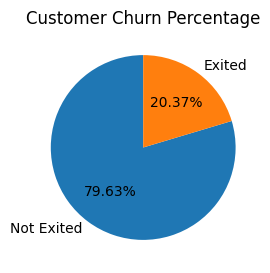

In [9]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

plt.subplots(figsize = (4, 3))
plt.pie(values, labels=labels,autopct = '%1.2f%%',startangle = 90)
plt.title('Customer Churn Percentage')

In [10]:
num_var = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
cat_var = ['Geography','Gender','HasCrCard','IsActiveMember']

In [11]:
for i in num_var:
  print("Variable:", i)
  print("Minimum:", df[i].min())
  print("Maximum:", df[i].max())
  print("Mean:", df[i].mean())
  print()

Variable: CreditScore
Minimum: 350
Maximum: 850
Mean: 650.5288

Variable: Age
Minimum: 18
Maximum: 92
Mean: 38.9218

Variable: Tenure
Minimum: 0
Maximum: 10
Mean: 5.0128

Variable: Balance
Minimum: 0.0
Maximum: 250898.09
Mean: 76485.889288

Variable: NumOfProducts
Minimum: 1
Maximum: 4
Mean: 1.5302

Variable: EstimatedSalary
Minimum: 11.58
Maximum: 199992.48
Mean: 100090.239881



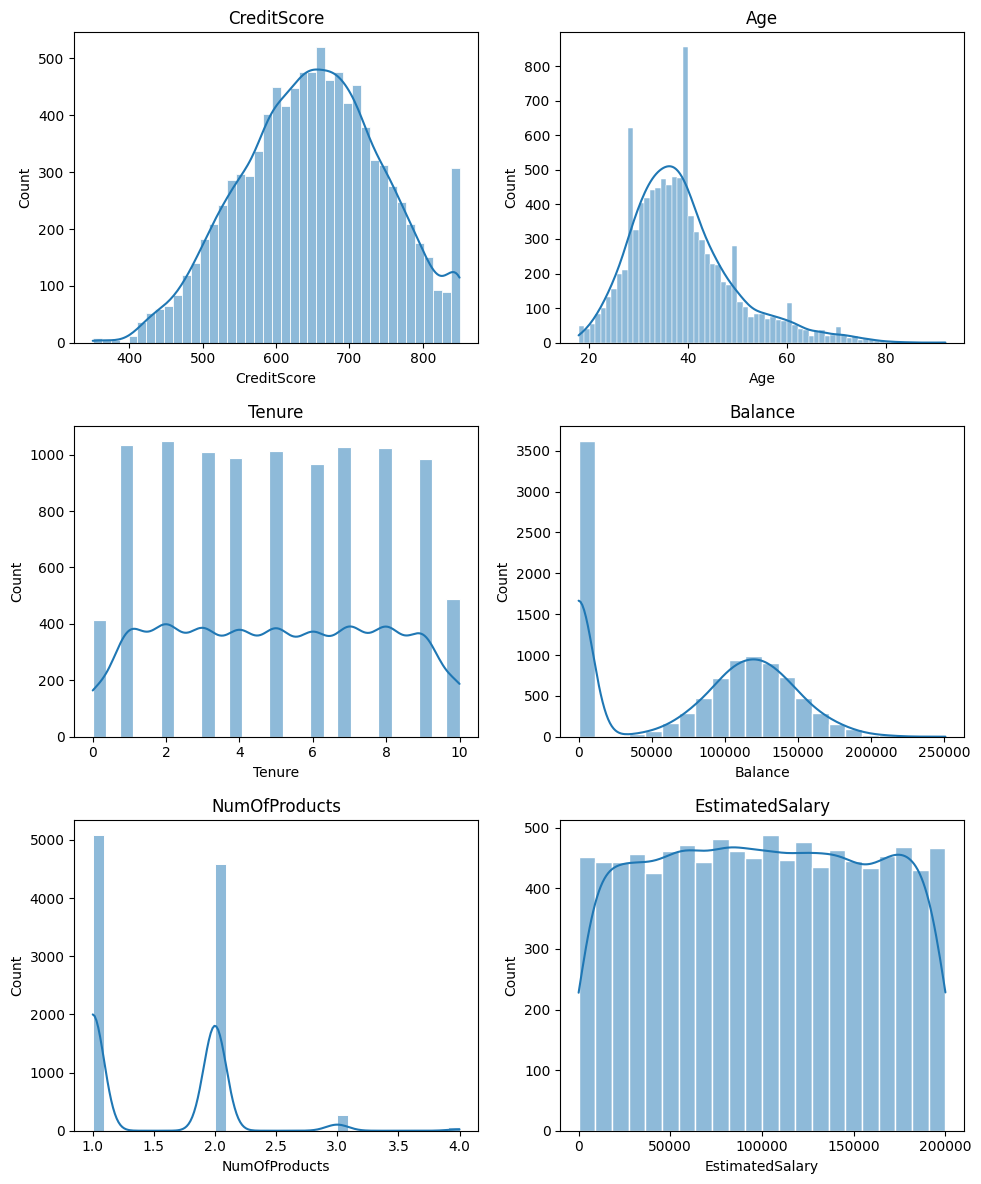

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
sns.set(rc={'figure.figsize':(10,6)})
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.histplot(data=df[num_var[i]], kde=True, ax=ax)
    ax.set_title(num_var[i])

plt.tight_layout()

Credit Score and Age has skewed distribution. While Tenure, Balance, Number of Products and Estimated Salary do not follow any specific distributions.

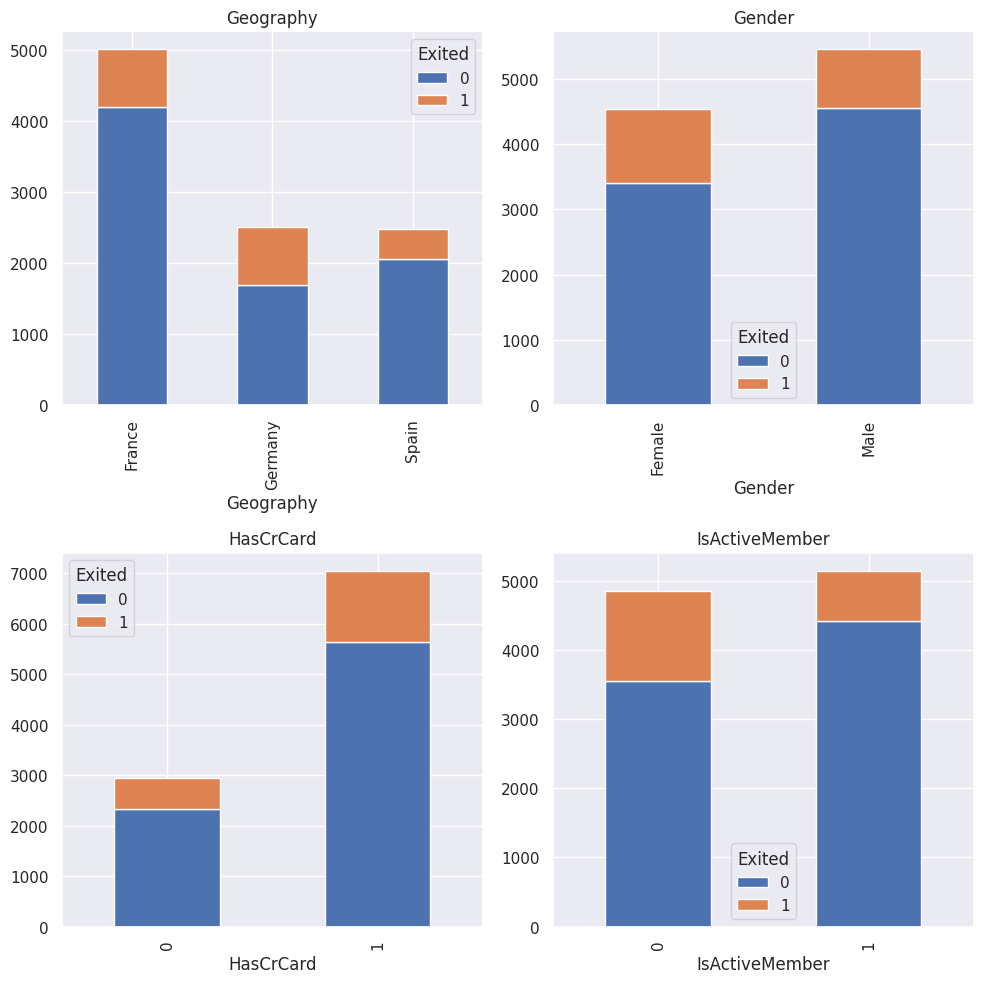

In [13]:
fig,axes =plt.subplots(2,2,figsize=(10,10))
axes = axes.flatten()

for i, x in enumerate(cat_var):
    ax = axes[i]
    df.groupby([x,'Exited']).size().unstack().plot(kind='bar', ax=ax,stacked=True)
    ax.set_title(x)

plt.tight_layout()

* Geography: Germany has the greatest number of exited customers whereas Spain witness the lowest rate of customer exit.

* Gender:Males are more likely to exit rather than female

* Credit card processing: having credit card is more likely to exit rather than not having credit card

* Active member: Non-active member has higher probability of exit

#Preprocess data

In [14]:
df=pd.get_dummies(df, columns=['Geography','Gender'])

<Axes: >

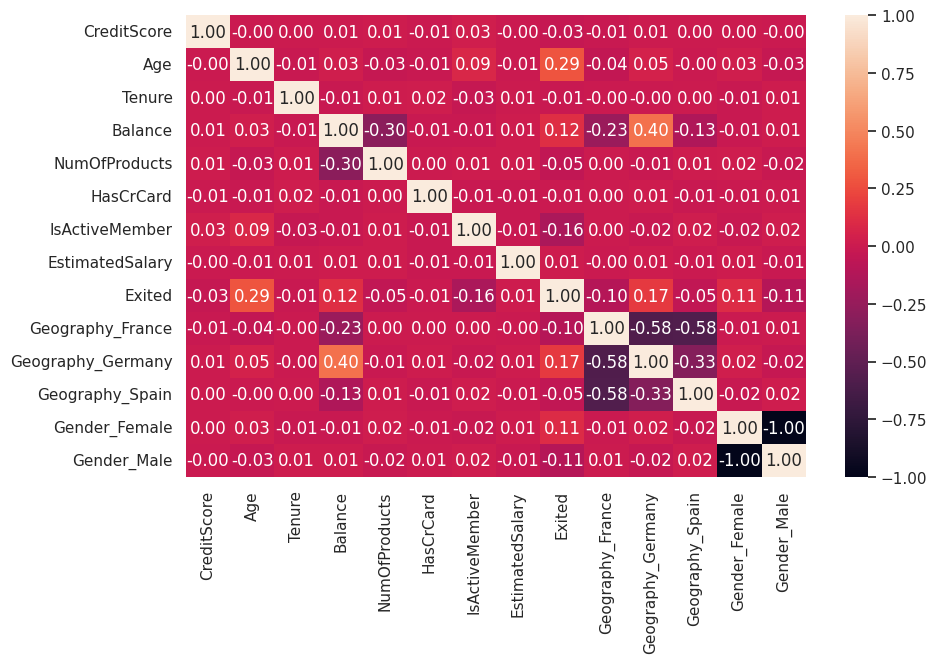

In [15]:
sns.heatmap(df.corr(), annot=True,fmt=".2f")

It seems like Age, Balance, Geography and Gender tend to have positive correlation with the probability of customer Exit or not.

In contrast, there's negative correlation between Exit versuus IsActiveMember.

#Split dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [17]:
X = df.iloc[:,[col for col in range(14) if col !=8]].values

In [18]:
y=df['Exited']

In [19]:
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)

print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (6000, 13) y_train.shape (6000,)
X_cv.shape (2000, 13) y_cv.shape (2000,)
X_test.shape (2000, 13) y_test.shape (2000,)


#Feature scaling

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

#Build model

##Neural Network

In [ ]:
model = Sequential(
    [
        Dense(13, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name='input'),
        Dense(6,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1), name='hidden'),
        Dense(1,activation='sigmoid',name='output')
    ]
)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01)

)

In [ ]:
model.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
188/188 [==============================] - 1s 2ms/step - loss: 0.6481
Epoch 2/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4896
Epoch 3/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4820
Epoch 4/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4800
Epoch 5/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4722
Epoch 6/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4713
Epoch 7/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4692
Epoch 8/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4712
Epoch 9/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4671
Epoch 10/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4657
Epoch 11/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4637
Epoch 12/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4623
E

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 13)                182       
                                                                 
 hidden (Dense)              (None, 6)                 84        
                                                                 
 output (Dense)              (None, 1)                 7         
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 273 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred_prob = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_pred = (y_pred_prob>0.5)

In [ ]:
print("Accuracy Score", accuracy_score(y_test, y_pred))

Accuracy Score 0.805


In [ ]:
#Geography: Spain
#Credit Score:680
#Gender: Female
#Age: 45 years old
#Tenure: 2.5 years
#Balance: $60000
#Number of Products: 2
#with Credit Card
#Active member
#Estimated Salary: $50000

newdata = [[680,45,2.5,60000,2,1,1,50000,0,0,1,1,0]]
scaled = scaler.transform(newdata)

print(model.predict(scaled))
print(model.predict(scaled)>0.5)

1/1 [==============================] - 0s 19ms/step
[[0.23969962]]
1/1 [==============================] - 0s 19ms/step
[[False]]


This customers have 23.97% to leave.

##Decision Tree Classifer

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [23]:
features = [ x for x in df.columns if x not in 'Exited']

print(len(features))

13


In [24]:
X_train, X_val, y_train, y_val = train_test_split(df[features],df['Exited'], train_size = 0.8, random_state = 2)

print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 8000
validation samples: 2000
target proportion: 0.2067


The hyperparameters we will use and investigate here are:

 - min_samples_split: The minimum number of samples required to split an internal node.
   - Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
 - max_depth: The maximum depth of the tree.
   - Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

In [25]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

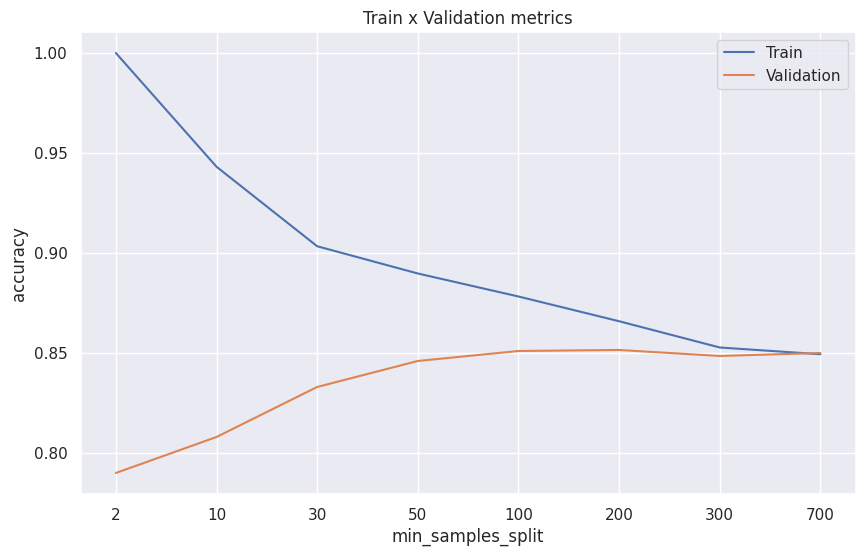

In [26]:
accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = 2).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

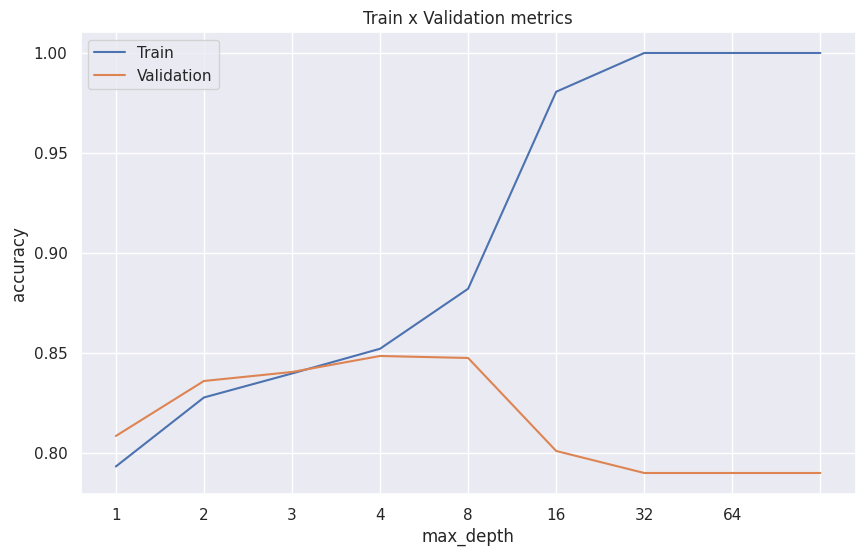

In [27]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 2).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [28]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 200,
                                             max_depth = 4,
                                             random_state = 2).fit(X_train,y_train)

In [29]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8499
Metrics validation:
	Accuracy score: 0.8505


##Random Forest Classifer

Ensemble method:
* I will use only square(n) features to train each decision tree
* I wil use n_jbs to fit multiple trees simulataneously as the fitting process is independent

In [30]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

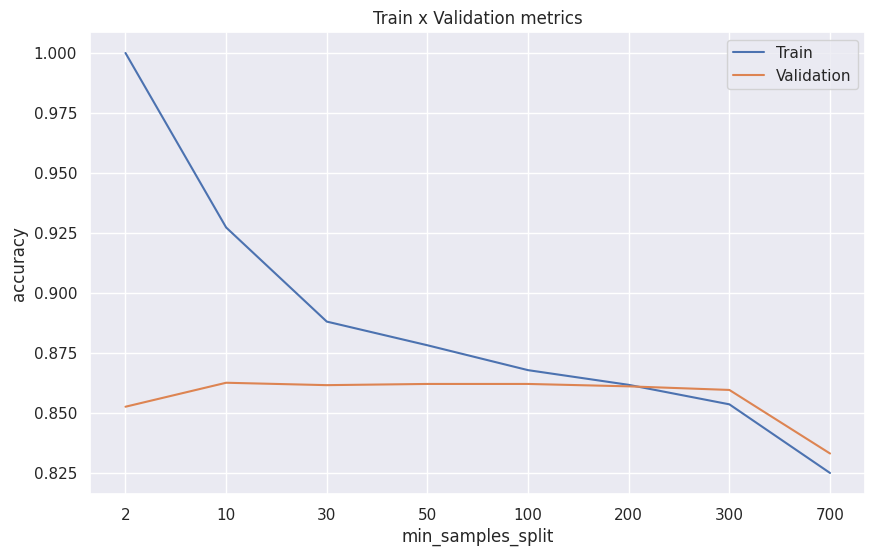

In [31]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 2).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

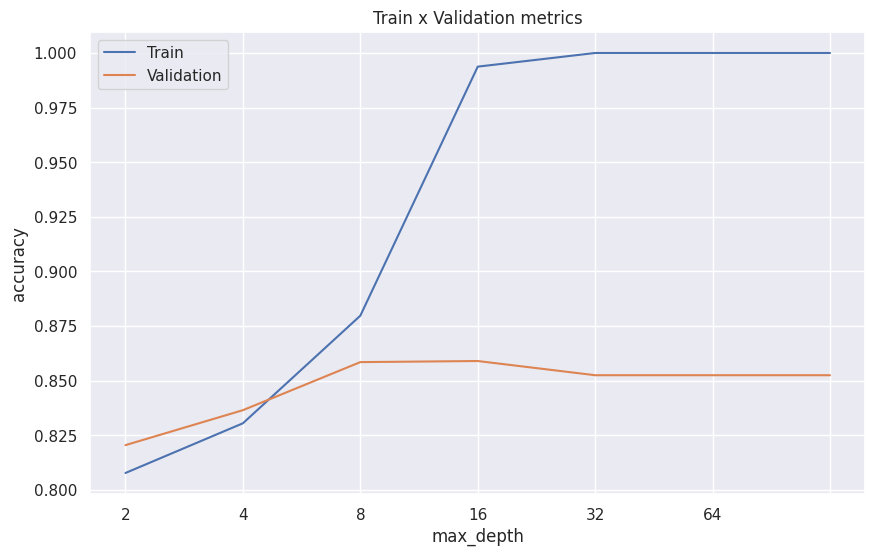

In [32]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 2).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

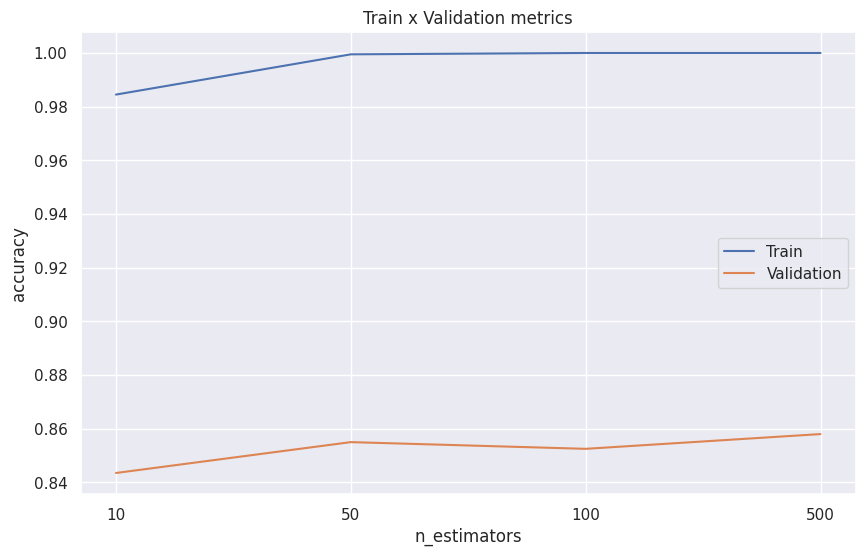

In [33]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 2).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [34]:
random_forest_model = RandomForestClassifier(n_estimators = 500,
                                             max_depth = 8,
                                             min_samples_split = 10).fit(X_train,y_train)

In [35]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8782
Metrics test:
	Accuracy score: 0.8605


##XGBoost

* Random Forest is to ensemble Decision Trees and train them independently
* XGBoost is to ensemble Decision Trees just like Random Forest but each Decision Tree is train dependently on each other.

In [39]:
n = int(len(X_train)*0.8) #use only 80% of the train set to train and remaining 20% is to evaluate

X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [40]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = 2)

xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)], early_stopping_rounds = 10)

[0]	validation_0-logloss:0.46778
[1]	validation_0-logloss:0.44547
[2]	validation_0-logloss:0.42697
[3]	validation_0-logloss:0.41267
[4]	validation_0-logloss:0.39952
[5]	validation_0-logloss:0.38918
[6]	validation_0-logloss:0.37975
[7]	validation_0-logloss:0.37206
[8]	validation_0-logloss:0.36549
[9]	validation_0-logloss:0.36007
[10]	validation_0-logloss:0.35546
[11]	validation_0-logloss:0.35180
[12]	validation_0-logloss:0.34806
[13]	validation_0-logloss:0.34429
[14]	validation_0-logloss:0.34172
[15]	validation_0-logloss:0.33920
[16]	validation_0-logloss:0.33707
[17]	validation_0-logloss:0.33540
[18]	validation_0-logloss:0.33375
[19]	validation_0-logloss:0.33252
[20]	validation_0-logloss:0.33103
[21]	validation_0-logloss:0.33004
[22]	validation_0-logloss:0.32843
[23]	validation_0-logloss:0.32756
[24]	validation_0-logloss:0.32682
[25]	validation_0-logloss:0.32545
[26]	validation_0-logloss:0.32475
[27]	validation_0-logloss:0.32414
[28]	validation_0-logloss:0.32386
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [41]:
xgb_model.best_iteration

41

In [42]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8828
Metrics test:
	Accuracy score: 0.8570
